# Stock Price Prediction with Linear Regression and Technical Indicators

# 📈 Stock Price Prediction Analysis Report

## 1. Objective

The primary objective of this analysis is to determine whether incorporating technical indicators into a predictive model can outperform a simple "previous day's closing price" (naive baseline) model in forecasting the next day's stock closing price for **Apple (AAPL)**.

---

## 2. Methodology

- **Data**: Historical daily stock data for AAPL was collected, cleaned, and enriched with technical indicators:
  - Simple Moving Average (SMA)
  - Exponential Moving Average (EMA)
  - MACD
  - RSI
  - Stochastic Oscillators
  - Bollinger Bands
  - ATR (Average True Range)
  - `Previous_Close` was engineered for direct baseline comparison

- **Modeling Approach**: A **Linear Regression** model was implemented.

- **Validation Strategy**: A rigorous **walk-forward validation** was applied, simulating real-world trading by incrementally training and predicting without data leakage.

- **Baseline**: The "previous day's closing price" served as the naive baseline model.

- **Evaluation Metrics**: 
  - **Mean Absolute Error (MAE)**
  - **Mean Squared Error (MSE)**

---

## 3. Key Findings

| Model                 | MAE    | MSE    |
|-----------------------|--------|--------|
| **Linear Regression** | 0.419  | 0.395  |
| **Baseline**          | 1.192  | 3.649  |

### Superior Accuracy of Linear Regression
- Linear Regression achieved an **MAE of 0.419**, outperforming the Baseline's **1.192**.
- On average, the model's predictions were **$0.77 closer** to the actual close prices.

### Reduced Prediction Variance
- Linear Regression’s **MSE of 0.395** is significantly better than the Baseline’s **3.649**.
- Indicates that the model **avoids large errors** better and has **greater robustness**.

---

## 4. Insights

### "AAPL Stock Price Prediction: Linear Regression vs Baseline"
- **White Line**: Actual Close Price  
- **Lime Green Line**: Linear Regression Prediction  
- **Yellow Line**: Baseline Prediction  

> Linear Regression closely follows actual prices, while the baseline lags behind during price swings.

### "Daily Mean Absolute Error: Linear Regression vs Baseline"
- **Lime Green Line**: Linear Regression MAE  
- **Yellow Line**: Baseline MAE  

> Linear Regression’s daily errors consistently remain below those of the baseline, confirming superior accuracy.

---

## 5. Conclusion

The analysis provides **strong evidence** that incorporating technical indicators and applying a **Linear Regression model** significantly outperforms a naive "previous close" strategy for forecasting AAPL’s next-day closing prices.

- Metrics show **greater accuracy and stability**.
- Confirms that **technical indicators contain predictive signal** when used appropriately.

---

## 6. Further Improvements

- **Model Complexity**: Using advanced models like **Random Forests** or **Neural Networks** to capture **non-linear patterns**.
- **Directional Accuracy**: Evaluating the model’s ability to predict **up/down movements**, not just exact prices.
- **Generalization**: Testing across **other tickers** or **market periods** to assess broader applicability.


## 1. Setup and Imports

In [9]:
# Install necessary packages (uncomment if not already installed)
%pip install pandas scikit-learn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Changed from RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import sys
import pathlib

# Add the 'Main' directory to the system path to import custom modules
main_path = pathlib.Path("..", "Main").resolve()
sys.path.append(str(main_path))

from data_collection import StockDataCollector
from data_cleaning import StockDataCleaner
from technical_indicators import TechnicalIndicators

## 2. Data Loading and Preparation

In [11]:
# 1. Collect data
collector = StockDataCollector(historical_data_path='../Datasets/Historical Data') # specify the path of dataset dir
collector.collect_data()

# 2. Clean data
cleaner = StockDataCleaner()
cleaned_data = cleaner.clean_all(collector)

# Using Apple data (or any other ticker available)
AAPL = cleaned_data["AAPL"].copy() # .copy() to avoid SettingWithCopyWarning

print(f"Apple Stock (first 5 rows):\n{AAPL.head()}\n")
print(f"Apple Stock (last 5 rows):\n{AAPL.tail()}\n")

Looking for data in: c:\Users\LENOVO\Documents\GISMA\Data Mining\Stock-Predictions\Datasets\Historical Data
Successfully loaded 5 tickers
Apple Stock (first 5 rows):
        Date   Close    Volume    Open    High       Low
0 2025-06-13  196.45  51447350  199.73  200.37  195.7000
1 2025-06-12  199.20  43904640  199.08  199.68  197.3601
2 2025-06-11  198.78  60989860  203.50  204.50  198.4100
3 2025-06-10  202.67  54672610  200.60  204.35  200.5700
4 2025-06-09  201.45  72862560  204.39  206.00  200.0200

Apple Stock (last 5 rows):
           Date   Close     Volume     Open     High      Low
2511 2015-06-19  31.650  217446120  31.9275  31.9550  31.6000
2512 2015-06-18  31.970  141455960  31.8075  32.0775  31.8050
2513 2015-06-17  31.825  131435600  31.9300  31.9700  31.6850
2514 2015-06-16  31.900  125774600  31.7575  31.9625  31.5925
2515 2015-06-15  31.730  175587840  31.5250  31.8100  31.4275



## 3. Feature Engineering (Lagged Prices & Technical Indicators)

In [12]:
# Create lagged closing price as a baseline and feature (avoiding data leakage)
AAPL['Previous_Close'] = AAPL['Close'].shift(1)

# Calculate all technical indicators
aapl_with_indicators = TechnicalIndicators.calculate_all_indicators(AAPL)

# Drop rows with NaN values introduced by shifting and indicator calculations
aapl_with_indicators.dropna(inplace=True)

print(f"Shape of aapl_with_indicators after dropna: {aapl_with_indicators.shape}")
if aapl_with_indicators.empty:
    print("WARNING: aapl_with_indicators is EMPTY after dropna! Check your data or indicators.")

print(f"AAPL data with indicators (first 5 rows after dropping NaNs):\n{aapl_with_indicators.head()}\n")
print(f"Columns available for features: {aapl_with_indicators.columns.tolist()}\n")

Shape of aapl_with_indicators after dropna: (2515, 20)
AAPL data with indicators (first 5 rows after dropping NaNs):
        Date   Close    Volume    Open    High       Low  Previous_Close  \
1 2025-06-12  199.20  43904640  199.08  199.68  197.3601          196.45   
2 2025-06-11  198.78  60989860  203.50  204.50  198.4100          199.20   
3 2025-06-10  202.67  54672610  200.60  204.35  200.5700          198.78   
4 2025-06-09  201.45  72862560  204.39  206.00  200.0200          202.67   
5 2025-06-06  203.92  46607690  203.00  205.70  202.0500          201.45   

       SMA_50     SMA_200      EMA_12      EMA_26      MACD  MACD_Signal  \
1  197.825000  197.825000  196.873077  196.653704  0.219373     0.043875   
2  198.143333  198.143333  197.166450  196.811207  0.355243     0.106148   
3  199.275000  199.275000  198.013150  197.245192  0.767958     0.238510   
4  199.710000  199.710000  198.541896  197.556659  0.985237     0.387856   
5  200.411667  200.411667  199.369297  198.028

## 4. Model Building and Walk-Forward Validation

In [13]:
# Define features and target
features = [
    'Previous_Close', 'Volume', 'Open', 'High', 'Low',
    'SMA_50', 'SMA_200', 'EMA_12', 'EMA_26',
    'MACD', 'MACD_Signal', 'MACD_Hist',
    'RSI', 'Stoch_%K', 'Stoch_%D',
    'BB_Upper', 'BB_Lower', 'ATR'
]
target = 'Close'

# Ensure all features exist in the DataFrame
existing_features = [f for f in features if f in aapl_with_indicators.columns]
if len(existing_features) != len(features):
    print("Warning: Some specified features are not in the DataFrame and will be skipped.")
    features = existing_features

print(f"Using features: {features}")

# Parameters for walk-forward validation
train_window_size = 252 # Approximately 1 year of trading days
test_window_size = 20  # Predict for the next 20 trading days (approx 1 month)

# Min data length check
min_data_needed = train_window_size + test_window_size + 1 # +1 for safe indexing
if len(aapl_with_indicators) < min_data_needed:
    print(f"Error: Not enough data for the chosen window sizes. Need at least {min_data_needed} rows, but only have {len(aapl_with_indicators)}.")
    print("Adjust train_window_size, test_window_size, or get more historical data.")
else:
    print(f"Total data points available for walk-forward: {len(aapl_with_indicators)}")
    print(f"Number of walk-forward iterations: {len(aapl_with_indicators) - train_window_size - test_window_size}")

linear_reg_predictions = []
baseline_predictions = []
actual_prices = []
prediction_dates = []

daily_linear_reg_mae = []
daily_baseline_mae = []

"""walk-forward validation"""
for i in range(train_window_size, len(aapl_with_indicators) - test_window_size):
    if (i - train_window_size) % 100 == 0:
        print(f"Processing walk-forward iteration: {i - train_window_size}")

    train_data = aapl_with_indicators.iloc[i - train_window_size : i]
    test_data = aapl_with_indicators.iloc[i : i + test_window_size]

    # checking for empty dataset, prevents 0 sample space
    if train_data.empty or test_data.empty:
        print(f"Skipping iteration {i}: train_data or test_data is empty. Review window sizes and data length.")
        continue

    X_train = train_data[features]
    y_train = train_data[target]

    if X_train.empty or y_train.empty:
        print(f"Skipping iteration {i}: X_train or y_train is empty after feature selection.")
        continue

    # Linear Regression Model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    for j in range(len(test_data)):
        current_test_features = test_data[features].iloc[[j]] 
        current_actual = test_data[target].iloc[j]
        current_previous_close = test_data['Previous_Close'].iloc[j]
        current_date = test_data.index[j]

        # Check if current_test_features is empty before predicting
        if current_test_features.empty:
            print(f"Skipping prediction at iteration {i}, sub-index {j}: current_test_features is empty.")
            continue

        # Get prediction from Linear Regression model
        linear_reg_pred = linear_model.predict(current_test_features)[0]

        # Get prediction from baseline model (previous day's close)
        baseline_pred = current_previous_close

        linear_reg_predictions.append(linear_reg_pred)
        baseline_predictions.append(baseline_pred)
        actual_prices.append(current_actual)
        prediction_dates.append(current_date)

        daily_linear_reg_mae.append(mean_absolute_error([current_actual], [linear_reg_pred]))
        daily_baseline_mae.append(mean_absolute_error([current_actual], [baseline_pred]))

Using features: ['Previous_Close', 'Volume', 'Open', 'High', 'Low', 'SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI', 'Stoch_%K', 'Stoch_%D', 'BB_Upper', 'BB_Lower', 'ATR']
Total data points available for walk-forward: 2515
Number of walk-forward iterations: 2243
Processing walk-forward iteration: 0
Processing walk-forward iteration: 100
Processing walk-forward iteration: 200
Processing walk-forward iteration: 300
Processing walk-forward iteration: 400
Processing walk-forward iteration: 500
Processing walk-forward iteration: 600
Processing walk-forward iteration: 700
Processing walk-forward iteration: 800
Processing walk-forward iteration: 900
Processing walk-forward iteration: 1000
Processing walk-forward iteration: 1100
Processing walk-forward iteration: 1200
Processing walk-forward iteration: 1300
Processing walk-forward iteration: 1400
Processing walk-forward iteration: 1500
Processing walk-forward iteration: 1600
Processing walk-forward iteration:

## 5. Evaluation and Visualization

## Visual Report

### Prediction vs. Actuals Plot

- **Linear Regression Prediction (Lime Green)**:  
  Closely tracks the actual stock price, showing strong predictive alignment with market movements.

- **Actual Close Price (White)**:  
  Represents the true daily closing prices of AAPL.

- **Baseline Prediction (Yellow)**:  
  Lags behind the actual price—simply reflects the previous day's value, failing to anticipate movements.

---

### Daily Mean Absolute Error (MAE) Plot

- **Linear Regression Daily MAE (Lime Green)**:  
  Consistently lower than baseline, indicating **smaller daily prediction errors**.

- **Baseline Daily MAE (Yellow)**:  
  Higher and more volatile, showing **larger and inconsistent daily errors**.

---

## Model Evaluation (What the Numbers Mean)

### Linear Regression Performance
- **MAE**: 0.419  → On average, predictions are only **$0.42 off** the actual price.

- **MSE**: 0.395  → Effectively avoids **large prediction errors**.

---

### Baseline (Previous Close) Performance
- **MAE**: 1.192  → On average, predictions are **$1.19 off**—almost triple the error of the model.

- **MSE**: 3.649  → Prone to **larger and riskier prediction mistakes**.

---

## Conclusion

The **Linear Regression model**, enhanced with **technical indicators**, significantly outperforms the naive **"previous day's close" baseline**.

- Delivers **more accurate** and **reliable** next-day stock price forecasts.
- Evidenced by **lower MAE and MSE**.
- Visually confirmed by its **closer tracking of actual prices** and **smaller daily errors**.

This analysis shows that even a simple linear model—when fed with meaningful indicators—can provide tangible predictive value over naive strategies.

Overall Linear Regression MAE: 0.419
Overall Linear Regression MSE: 0.395
Overall Baseline (Previous Close) MAE: 1.192
Overall Baseline (Previous Close) MSE: 3.649


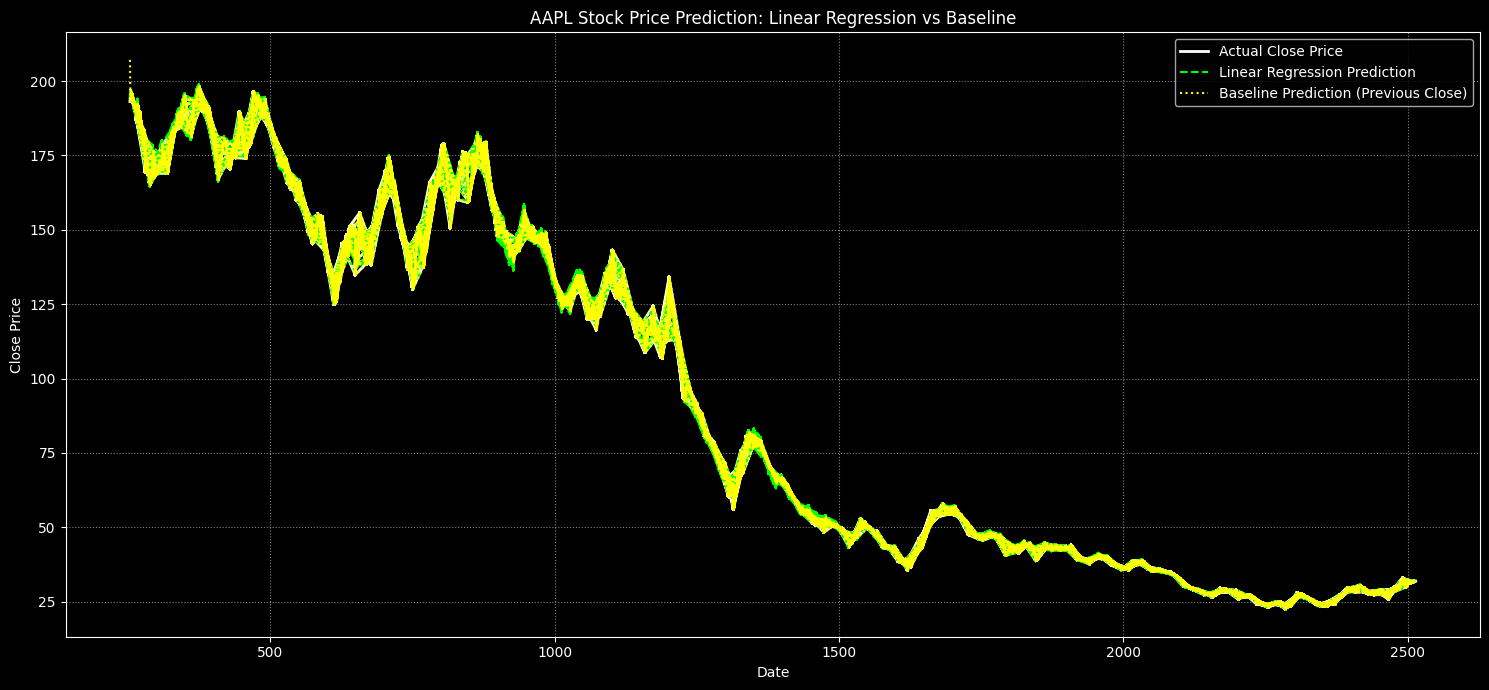

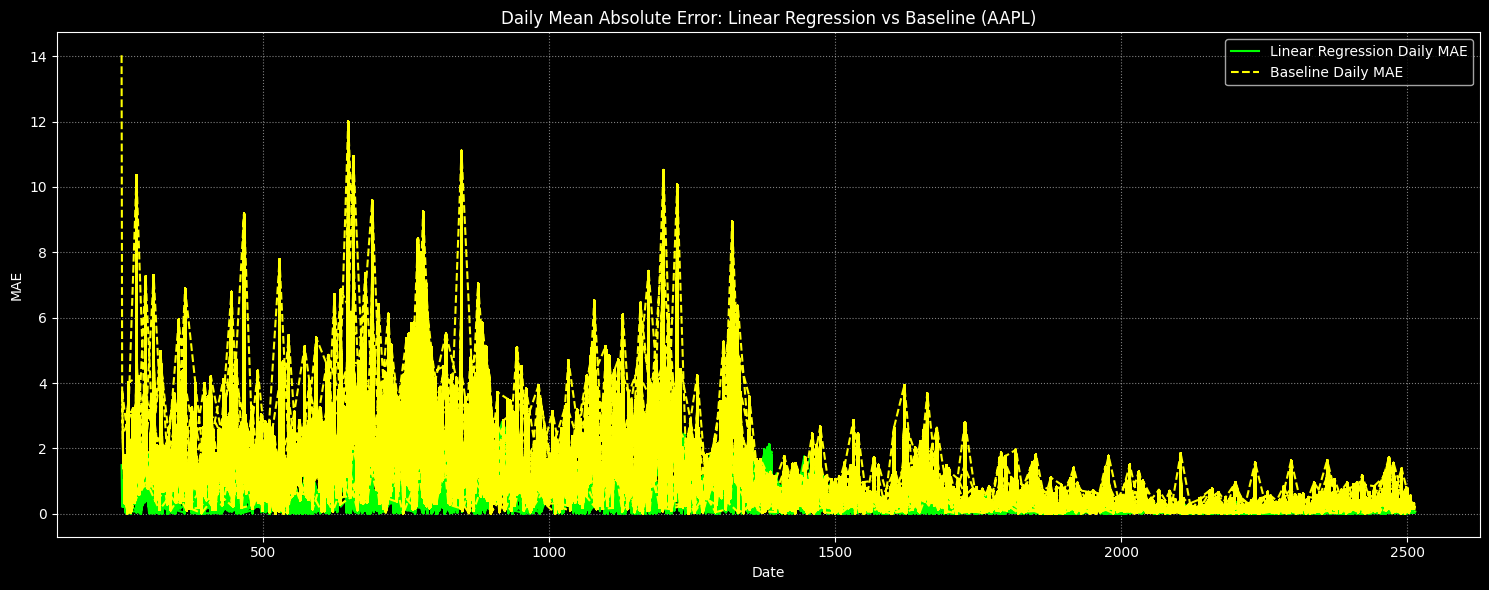

In [14]:
# Ensure there are predictions to evaluate
if not actual_prices:
    print("No predictions were made. Check data availability and loop conditions.")
else:
    # Use the collected prediction_dates directly as the index
    linear_reg_preds_series = pd.Series(linear_reg_predictions, index=prediction_dates)
    baseline_preds_series = pd.Series(baseline_predictions, index=prediction_dates)
    actual_prices_series = pd.Series(actual_prices, index=prediction_dates)

    daily_linear_reg_mae_series = pd.Series(daily_linear_reg_mae, index=prediction_dates)
    daily_baseline_mae_series = pd.Series(daily_baseline_mae, index=prediction_dates)

    # Calculate overall MAE and MSE
    overall_linear_reg_mae = mean_absolute_error(actual_prices, linear_reg_predictions)
    overall_linear_reg_mse = mean_squared_error(actual_prices, linear_reg_predictions)

    overall_baseline_mae = mean_absolute_error(actual_prices, baseline_predictions)
    overall_baseline_mse = mean_squared_error(actual_prices, baseline_predictions)

    print(f"Overall Linear Regression MAE: {overall_linear_reg_mae:.3f}")
    print(f"Overall Linear Regression MSE: {overall_linear_reg_mse:.3f}")
    print(f"Overall Baseline (Previous Close) MAE: {overall_baseline_mae:.3f}")
    print(f"Overall Baseline (Previous Close) MSE: {overall_baseline_mse:.3f}")

    # Plotting predictions vs actuals
    plt.figure(figsize=(15, 7))
    plt.style.use('dark_background')
    plt.plot(actual_prices_series.index, actual_prices_series, label='Actual Close Price', color='white', linewidth=2)
    plt.plot(linear_reg_preds_series.index, linear_reg_preds_series, label='Linear Regression Prediction', color='lime', linestyle='--')
    plt.plot(baseline_preds_series.index, baseline_preds_series, label='Baseline Prediction (Previous Close)', color='yellow', linestyle=':')
    plt.title('AAPL Stock Price Prediction: Linear Regression vs Baseline')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Plotting Daily MAE for comparison
    plt.figure(figsize=(15, 6))
    plt.style.use('dark_background')
    plt.plot(daily_linear_reg_mae_series.index, daily_linear_reg_mae_series, label='Linear Regression Daily MAE', color='lime')
    plt.plot(daily_baseline_mae_series.index, daily_baseline_mae_series, label='Baseline Daily MAE', color='yellow', linestyle='--')
    plt.title('Daily Mean Absolute Error: Linear Regression vs Baseline (AAPL)')
    plt.xlabel('Date')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()